#Environment setup

##Initial imports

In [ ]:
import pandas as pd
import numpy as np
from scipy.io import arff
import os
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Constants configurations

In [ ]:
path = '/tmp/extracted/'
drive_path = '/content/drive/MyDrive/Deep/Ass4/'


#Load and Preprocess

##Diabetes Dataset

In [ ]:
diabetes_data = arff.loadarff(drive_path+"diabetes.arff")
diabetes_df = pd.DataFrame(diabetes_data[0])
del diabetes_data
diabetes_df["class"].replace(b'tested_positive', 1,inplace=True)
diabetes_df["class"].replace(b'tested_negative', 0, inplace=True)
diabetes_df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


In [ ]:
diabetes_min = diabetes_df.min()
diabetes_max = diabetes_df.max()
normalized_diabetes_df=(diabetes_df-diabetes_min)/(diabetes_max-diabetes_min)
normalized_diabetes_df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


###Final Preprocess

In [ ]:
diabetes_real_data = normalized_diabetes_df.to_numpy()
diabetes_real_data.shape

(768, 9)

##German_credit Dataset

In [ ]:
ger_cred_data = arff.loadarff(drive_path+"german_credit.arff")
ger_cred_df = pd.DataFrame(ger_cred_data[0])
del ger_cred_data
ger_cred_df['21'].replace(b'1', 0,inplace=True)
ger_cred_df['21'].replace(b'2', 1,inplace=True)
ger_cred_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,b'A11',6.0,b'A34',b'A43',1169.0,b'A65',b'A75',4.0,b'A93',b'A101',4.0,b'A121',67.0,b'A143',b'A152',2.0,b'A173',1.0,b'A192',b'A201',0
1,b'A12',48.0,b'A32',b'A43',5951.0,b'A61',b'A73',2.0,b'A92',b'A101',2.0,b'A121',22.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',1
2,b'A14',12.0,b'A34',b'A46',2096.0,b'A61',b'A74',2.0,b'A93',b'A101',3.0,b'A121',49.0,b'A143',b'A152',1.0,b'A172',2.0,b'A191',b'A201',0
3,b'A11',42.0,b'A32',b'A42',7882.0,b'A61',b'A74',2.0,b'A93',b'A103',4.0,b'A122',45.0,b'A143',b'A153',1.0,b'A173',2.0,b'A191',b'A201',0
4,b'A11',24.0,b'A33',b'A40',4870.0,b'A61',b'A73',3.0,b'A93',b'A101',4.0,b'A124',53.0,b'A143',b'A153',2.0,b'A173',2.0,b'A191',b'A201',1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'A14',12.0,b'A32',b'A42',1736.0,b'A61',b'A74',3.0,b'A92',b'A101',4.0,b'A121',31.0,b'A143',b'A152',1.0,b'A172',1.0,b'A191',b'A201',0
996,b'A11',30.0,b'A32',b'A41',3857.0,b'A61',b'A73',4.0,b'A91',b'A101',4.0,b'A122',40.0,b'A143',b'A152',1.0,b'A174',1.0,b'A192',b'A201',0
997,b'A14',12.0,b'A32',b'A43',804.0,b'A61',b'A75',4.0,b'A93',b'A101',4.0,b'A123',38.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',0
998,b'A11',45.0,b'A32',b'A43',1845.0,b'A61',b'A73',4.0,b'A93',b'A101',4.0,b'A124',23.0,b'A143',b'A153',1.0,b'A173',1.0,b'A192',b'A201',1


In [ ]:
categorical_columns_names = []
numerical_columns_names = []
for column_name in ger_cred_df.columns[:-1]:
  if ger_cred_df[column_name].dtype == 'float64':
    numerical_columns_names.append(column_name)
  else:
    categorical_columns_names.append(column_name)

print(f"categorical_columns_names: {categorical_columns_names}")
print(f"numerical_columns_names: {numerical_columns_names}")

categorical_columns_names: ['1', '3', '4', '6', '7', '9', '10', '12', '14', '15', '17', '19', '20']
numerical_columns_names: ['2', '5', '8', '11', '13', '16', '18']


In [ ]:
#Numerical values are normalized
ger_cred_min = ger_cred_df[numerical_columns_names].min()
ger_cred_max = ger_cred_df[numerical_columns_names].max()
normalized_ger_cred_df = pd.DataFrame()

for numeric_column_name in numerical_columns_names:
  normalized_column=(ger_cred_df[numeric_column_name]-ger_cred_min[numeric_column_name])/(ger_cred_max[numeric_column_name]-ger_cred_min[numeric_column_name])
  normalized_ger_cred_df[numeric_column_name] = normalized_column


#Categorical values are one=hot encoded usin dummy variables
for categorical_column_name in categorical_columns_names:
  normalized_ger_cred_df = pd.concat((normalized_ger_cred_df, pd.get_dummies(ger_cred_df[categorical_column_name])), axis=1)

#concatinating the class column
normalized_ger_cred_df["class"] = ger_cred_df["21"]

normalized_ger_cred_df

,2,5,8,11,13,16,18,b'A11',b'A12',b'A13',b'A14',b'A30',b'A31',b'A32',b'A33',b'A34',b'A40',b'A41',b'A410',b'A42',b'A43',b'A44',b'A45',b'A46',b'A48',b'A49',b'A61',b'A62',b'A63',b'A64',b'A65',b'A71',b'A72',b'A73',b'A74',b'A75',b'A91',b'A92',b'A93',b'A94',b'A101',b'A102',b'A103',b'A121',b'A122',b'A123',b'A124',b'A141',b'A142',b'A143',b'A151',b'A152',b'A153',b'A171',b'A172',b'A173',b'A174',b'A191',b'A192',b'A201',b'A202',class
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.117647,0.081765,0.666667,1.000000,0.214286,0.000000,0.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
996,0.382353,0.198470,1.000000,1.000000,0.375000,0.000000,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0
997,0.117647,0.030483,1.000000,1.000000,0.339286,0.000000,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
998,0.602941,0.087763,1.000000,1.000000,0.071429,0.000000,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1


###Final Preprocess

In [ ]:
ger_cred_real_data = normalized_ger_cred_df.to_numpy()
print(ger_cred_real_data.shape)

(1000, 62)


#Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

##Diabetes

In [ ]:
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(normalized_diabetes_df[normalized_diabetes_df.columns[:-1]], normalized_diabetes_df["class"], test_size=0.3, random_state=1)
print(f"diabetes_X_train shape: {diabetes_X_train.shape}")
print(f"diabetes_y_train shape: {diabetes_y_train.shape}")
print(f"diabetes_X_test shape: {diabetes_X_test.shape}")
print(f"diabetes_y_test shape: {diabetes_y_test.shape}")

diabetes_X_train shape: (537, 8)
diabetes_y_train shape: (537,)
diabetes_X_test shape: (231, 8)
diabetes_y_test shape: (231,)


##German_credit 

In [ ]:
ger_cred_X_train, ger_cred_X_test, ger_cred_y_train, ger_cred_y_test = train_test_split(normalized_ger_cred_df[normalized_ger_cred_df.columns[:-1]], normalized_ger_cred_df["class"], test_size=0.3, random_state=1)
print(f"ger_cred_X_train shape: {ger_cred_X_train.shape}")
print(f"ger_cred_y_train shape: {ger_cred_y_train.shape}")
print(f"ger_cred_X_test shape: {ger_cred_X_test.shape}")
print(f"ger_cred_y_test shape: {ger_cred_y_test.shape}")

ger_cred_X_train shape: (700, 61)
ger_cred_y_train shape: (700,)
ger_cred_X_test shape: (300, 61)
ger_cred_y_test shape: (300,)


#Black Box Model - Random forest classifier

##Grid search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

model_type = RandomForestClassifier()

# Parameter combinations to try
parameters = {'n_estimators': [4, 6, 9],
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

def train_model_GS_CV(X_train, y_train, X_test, y_test, m_type):
  # Type of scoring used to compare parameter combinations
  acc_scorer = make_scorer(accuracy_score)

  # Run grid search
  grid_obj = GridSearchCV(m_type, parameters,
                          scoring=acc_scorer,
                          verbose=2,
                          return_train_score=True)
  
  grid_obj = grid_obj.fit(X_train, y_train)

  print("best_params",grid_obj.best_params_)
  # Parameters and evaluation of each model
  scores = pd.DataFrame(grid_obj.cv_results_)
  #scores[['params', 'mean_test_score', 'std_test_score', 'mean_train_score']]
  print("max mean val set score", max(scores['mean_test_score']))

  # Train again using best parametrs
  # Set the classification model to the best combination of parameters
  model = grid_obj.best_estimator_

  # Fit the best algorithm to the data.  
  model.fit(X_train, y_train)
  print("Final model train set accuracy: ", accuracy_score(y_train, model.predict(X_train)))
  print("Final model test set accuracy: ", accuracy_score(y_test, model.predict(X_test)))
  return model

##Diabetes

In [ ]:
diabetes_black_box_model = train_model_GS_CV(diabetes_X_train,diabetes_y_train, diabetes_X_test, diabetes_y_test, model_type)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=4 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=4, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=4 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=4, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=4 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=4, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=4 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=9,

[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed:   49.9s finished


In [ ]:
diabetes_p = diabetes_black_box_model.predict_proba(diabetes_X_test)[:,1]


##German_credit 

In [ ]:
ger_cred_black_box_model = train_model_GS_CV(ger_cred_X_train,ger_cred_y_train, ger_cred_X_test, ger_cred_y_test, model_type)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=9,

[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed:   51.1s finished


In [ ]:
ger_cred_p = ger_cred_black_box_model.predict_proba(ger_cred_X_test)[:,1]

In [ ]:
# ger_cred_p = ger_cred_black_box_model.predict_proba(ger_cred_X_test)[:,1]

# print("Min cs:", min(ger_cred_p))
# print("Max cs", max(ger_cred_p))
# print("Average cs", np.mean(ger_cred_p))

# x = range(len(ger_cred_p))
# plt.scatter(x, ger_cred_p, color='blue')
# plt.xlabel("Number of samples")
# plt.ylabel("Confidence Score")
# plt.show()

#GAN Model Construction

##Imports

In [ ]:
from keras.layers import Input, Dense, Concatenate, Lambda, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay
from keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import datetime


## GAN Class


In [ ]:
%load_ext tensorboard
logs_dir = drive_path + "/fit"
tensor_board_callback = TensorBoard(log_dir=logs_dir+"/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S"), histogram_freq=1)

In [ ]:
def shuffle_c_y(c, y):
  a,b = [],[]
  shuffle_indexes = np.random.randint(0, 2,size=len(c))   #vector of 0/1 length of c
  #index is the correct position
  #index=0 means that y is in positon 0
  for i, label in enumerate(shuffle_indexes):
    if label == 0:
      a.append(y[i])
      b.append(c[i])
    else:# label == 1
      b.append(y[i])
      a.append(c[i])
  return np.vstack(a),np.vstack(b),np.vstack(shuffle_indexes)

# vec_y = [0.5,0.4]
# vec_c = [0.2,0.1]
# shuffle_c_y(vec_c,vec_y)

In [ ]:
# ==============================================================================
# source: https://github.com/eriklindernoren/Keras-GAN/blob/master/dcgan/dcgan.py

def bb_predict_and_shuffle(tensor_in):
  print("tensor_in ", tensor_in)
  bb_model, c, g_z = tensor_in
  print("bb_model ", bb_model)
  print("c ", c)
  print("g_z ", g_z)
  
  bb_y = bb_model.predict_proba(g_z)[:,1]
  shuffeled_batch_a, shuffeled_batch_b, shuffeled_batch_y = shuffle_c_y(c=c,y=bb_y)
  return tf.convert_to_tensor(shuffeled_batch_a), tf.convert_to_tensor(shuffeled_batch_b)

class GAN():
    def __init__(self, columns_count, bb_model, learning_rate=0.001):
        # Input shape
        self.columns_count = columns_count
        self.latent_dim = 100 ##noise dim

        optimizer = Adam(learning_rate=learning_rate)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        #loss_d = - log(pred_d(x)) - log(1-pred_d(g(z)))
        #loss_g = - log(pred_d(g(z)))

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates samples
        z = Input(shape=(self.latent_dim,))
        c = Input(shape=(1,))
        a = Input(shape=(1,), name='input_a')
        b = Input(shape=(1,), name='input_b')

        g_z = self.generator([z,c])

        self.discriminator.trainable = False

        # lambda_layer = Lambda(bb_predict_and_shuffle,)((bb_model,c,g_z))
        # c, g_z
        # y = bb(g_z)
        # a,b = c,y

        # The discriminator takes generated samples as input and determines validity
        
        pred_d_g_z = self.discriminator([g_z, a, b])

        # The combined model  (stacked generator and discriminator)
        self.combined = Model([z, c, a, b], pred_d_g_z)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

        
    def build_generator(self):
        noise = Input(shape=(self.latent_dim,), name="z input")
        C = Input(shape=(1,), name="c input")

        # model = Sequential(name = "generator")
        # model.add(Dense(, activation="relu", input_dim=self.latent_dim))
        x_noise = Dense(self.latent_dim, activation='relu', 
                        input_dim=self.latent_dim, name='gen_dense_1')(noise) #
        x_noise = Dense(self.latent_dim, activation="relu", name='gen_dense_2')(x_noise)
        
        x_c = Dense(8, activation="relu",name='gen_dense_c')(C)

        x_combined = Concatenate(name='gen_concat_c')([x_noise, x_c])
        x_combined = BatchNormalization()(x_combined)

        if self.columns_count < 30:
          x_combined = Dense(64, activation="relu")(x_combined)
          x_combined = BatchNormalization()(x_combined)
          x_combined = Dense(32, activation="relu")(x_combined)
          x_combined = BatchNormalization()(x_combined)
          x_combined = Dense(self.columns_count, activation="relu")(x_combined)
          x_combined = BatchNormalization()(x_combined)
        else:
          x_combined = Dense(512, activation="relu")(x_combined)
          # x_combined = BatchNormalization()(x_combined)
          x_combined = Dense(256, activation="relu")(x_combined)
          # x_combined = BatchNormalization()(x_combined)
          x_combined = Dense(128, activation="relu")(x_combined)
          x_combined = Dense(64, activation="relu")(x_combined)
          x_combined = BatchNormalization()(x_combined)
          x_combined = Dense(64, activation="relu")(x_combined)
          x_combined = BatchNormalization()(x_combined)
          x_combined = Dense(self.columns_count, activation="relu")(x_combined)
          x_combined = BatchNormalization()(x_combined)
          x_combined = Dense(self.columns_count, activation="relu")(x_combined)
          x_combined = BatchNormalization()(x_combined)
          
          
          # x_combined = Dense(self.columns_count, activation="relu")(x_combined)

        out = Dense(self.columns_count, activation="sigmoid",name='gen_out')(x_combined)

        model = Model([noise, C], out, name="generator")

        model.summary()

        # g_z = model(noise)
        # return Model(noise, g_z)
        return model
    def build_discriminator(self):
        sample = Input(shape=(self.columns_count,), name="g_z input")
        a = Input(shape=(1,), name="a input")
        b = Input(shape=(1,), name="b input")

        x_sample = Dense(self.columns_count, activation="relu", 
                         input_dim=self.columns_count, name='disc_dense_1')(sample)
        # x_sample = Dense(self.columns_count, activation="relu", name='disc_dense_2')(x_sample)

        x_a = Dense(8, activation="relu", name='disc_a_dense')(a)

        x_combined = Concatenate(name='disc_concat_a')([x_sample, x_a])

        x_b = Dense(8, activation="relu", name='disc_b_dense')(b)

        x_combined = Concatenate(name='disc_concat_b')([x_combined, x_b])

        if self.columns_count < 30:
          x_combined = Dense(30, activation="relu")(x_combined)
          x_combined = Dropout(0.05)(x_combined)
          x_combined = Dense(30, activation="relu")(x_combined)
          x_combined = Dense(30, activation="relu")(x_combined)
          x_combined = Dense(15, activation="relu")(x_combined)
          x_combined = Dense(10, activation="relu")(x_combined)
          x_combined = Dropout(0.1)(x_combined)
          x_combined = Dense(self.columns_count/2, activation="relu")(x_combined)
        else:
          x_combined = Dense(30, activation="relu")(x_combined)
          x_combined = Dropout(0.2)(x_combined)
          x_combined = Dense(30, activation="relu")(x_combined)
          x_combined = Dense(30, activation="relu")(x_combined)
          x_combined = Dense(30, activation="relu")(x_combined)
          x_combined = Dense(30, activation="relu")(x_combined)
          x_combined = Dense(15, activation="relu")(x_combined)
        
        out = Dense(1, activation='sigmoid', name='disc_out')(x_combined)

        model = Model([sample, a, b], out, name="discriminator")
        model.summary()

        # validity = model(sample)

        # return Model(sample, validity)
        return model

    def save_model(self, model, model_type):
        if model_type == "discriminator":
            model.save('pre-trained_models/DCGAN26/discriminator')
        elif model_type == "generator":
            model.save('pre-trained_models/DCGAN26/generator')

    def load_pretrained_modles(self):
        self.discriminator = Model.load_model('pre-trained_models/DCGAN26/discriminator')
        self.generator = Model.load_model('pre-trained_models/DCGAN26/generator')

    def train(self, black_box_model, real_data, epochs, discriminator_loss_steps = 10, batch_size=32,save_interval=50):

        # # Load the dataset
        # (X_train, _), (_, _) = mnist.load_data()

        # # Rescale -1 to 1
        # X_train = X_train / 127.5 - 1.
        # X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths - real classified as ones and generated as zeros
        # valid = np.ones((batch_size, 1)) #labels for the real data samples
        # fake = np.zeros((batch_size, 1)) #labels for the generated data samples


        history = {
            "d_accuracy": [],
            "d_loss": [],
            "g_loss": []
        }
        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select random samples
            # batch_real_samples = real_data[np.random.randint(0, real_data.shape[0], batch_size)]

            # Sample noise from normal distribution and generate a batch of new samples
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            c = np.random.uniform(0, 1, (batch_size))
            batch_gen_samples = self.generator.predict([noise,c])

            #Generate predictions - Y using the black box model
            bb_y = black_box_model.predict_proba(batch_gen_samples)[:,1]
           
            shuffeled_batch_a, shuffeled_batch_b, shuffeled_batch_y = shuffle_c_y(c=c,y=bb_y)
  
            # print("batch_gen_samples shape:", batch_gen_samples.shape)
            # print("shuffel_a shape:", len(shuffeled_batch_a))
            # print("shuffel_a:", shuffeled_batch_a)
            # print("shuffel_b shape:", len(shuffeled_batch_b))
            # print("shuffel_b:", shuffeled_batch_b)
            # print("shuffel_y shape:", len(shuffeled_batch_y))
            # print("shuffel_y:", shuffeled_batch_y)
            

            # Train the discriminator
            if epoch % discriminator_loss_steps == 0:
              d_loss = self.discriminator.train_on_batch([batch_gen_samples, shuffeled_batch_a, shuffeled_batch_b], shuffeled_batch_y)
            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator (wants discriminator to mistake generated samples as real)
            fake_shuffeled_batch_y = 1 - shuffeled_batch_y
            g_loss = self.combined.train_on_batch([noise,c, shuffeled_batch_a, shuffeled_batch_b], fake_shuffeled_batch_y)

            # Plot the progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
            
            history["d_accuracy"].append(d_loss[1])
            history["d_loss"].append(d_loss[0])
            history["g_loss"].append(g_loss)

            # If at save interval => save generated image samples
            # if epoch % save_interval == 0:
                # self.save_imgs(epoch)
                # self.save_model(self.discriminator, "discriminator")
                # self.save_model(self.generator, "generator")
        return history
    def generate_samples(self, num_of_samples=10):
        noise = np.random.normal(0, 1, (num_of_samples, self.latent_dim))
        c = np.random.uniform(0, 1, (num_of_samples))
        return self.generator.predict([noise,c]), c

    def discriminate(self, samples, a, b):
      return self.discriminator.predict([samples,a,b])

#Model creation

##Diabetes Model

In [ ]:
diabetes_gan = GAN(len(normalized_diabetes_df.columns)-1,bb_model =diabetes_black_box_model ,learning_rate=0.000005)
diabetes_gan.combined.summary()

Model: "discriminator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
g_z input (InputLayer)          [(None, 8)]          0                                            
__________________________________________________________________________________________________
a input (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
disc_dense_1 (Dense)            (None, 8)            72          g_z input[0][0]                  
__________________________________________________________________________________________________
disc_a_dense (Dense)            (None, 8)            16          a input[0][0]                    
______________________________________________________________________________________

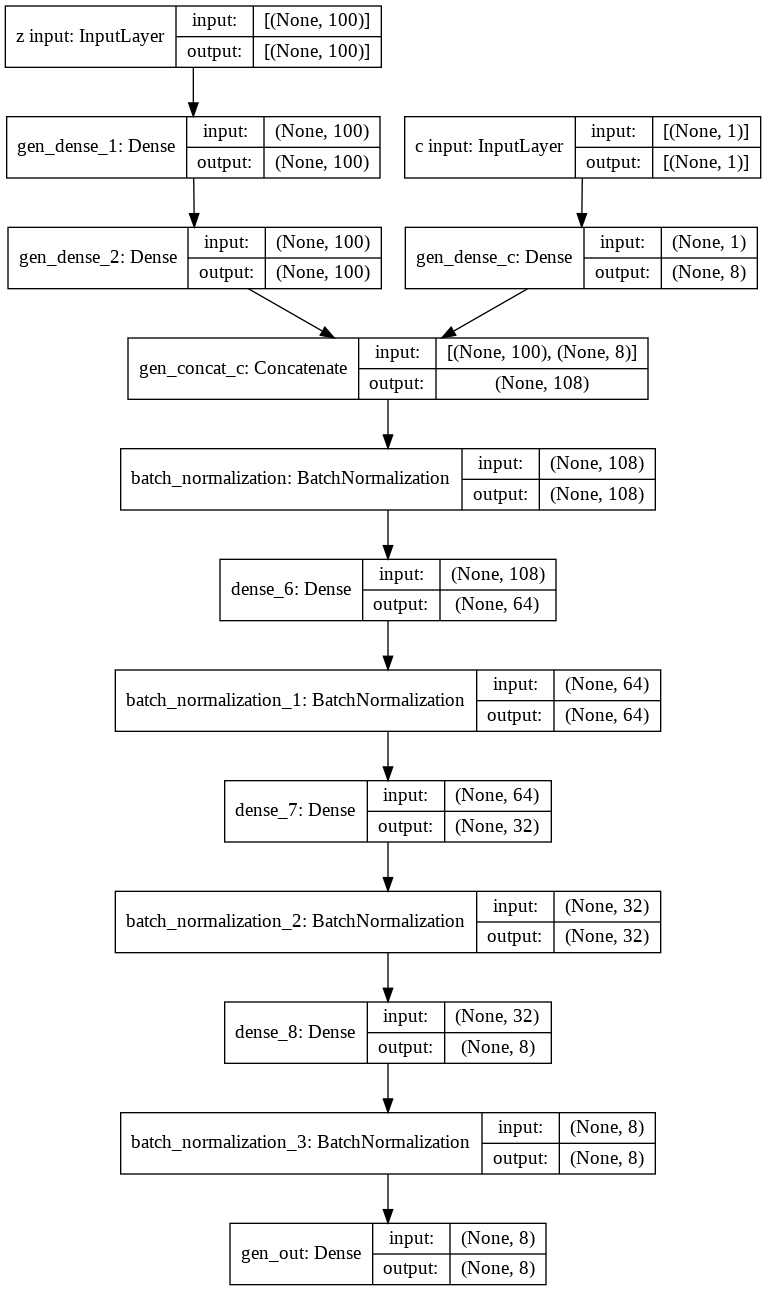

In [ ]:
plot_model(diabetes_gan.generator, show_shapes=True)

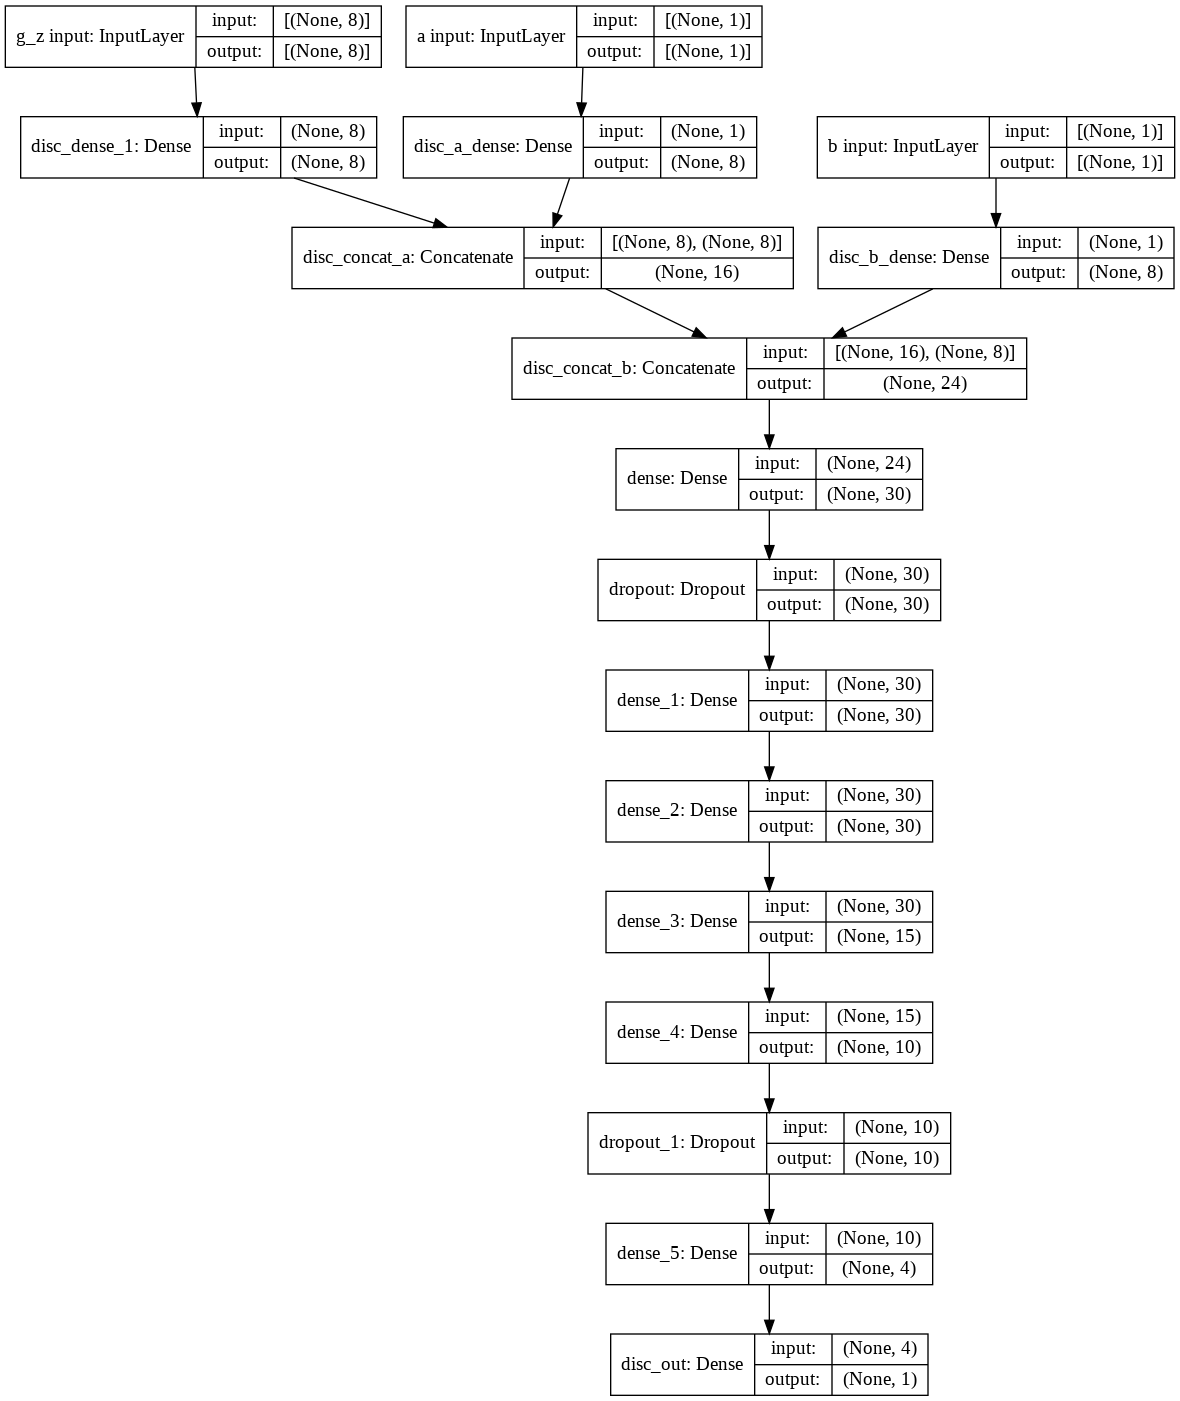

In [ ]:
plot_model(diabetes_gan.discriminator, show_shapes=True)

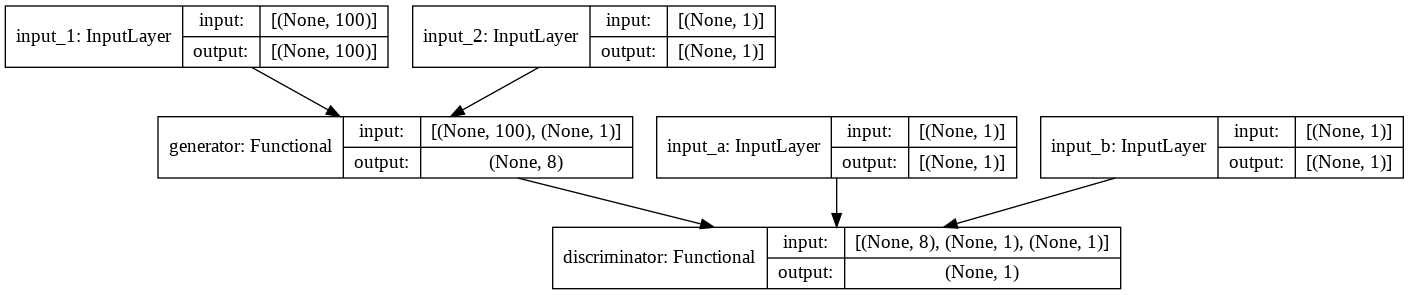

In [ ]:
plot_model(diabetes_gan.combined, show_shapes=True)

##German_credit Model

In [ ]:
ger_cred_gan = GAN(len(normalized_ger_cred_df.columns)-1,bb_model =ger_cred_black_box_model,learning_rate=0.0001)
ger_cred_gan.combined.summary()

Model: "discriminator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
g_z input (InputLayer)          [(None, 61)]         0                                            
__________________________________________________________________________________________________
a input (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
disc_dense_1 (Dense)            (None, 61)           3782        g_z input[0][0]                  
__________________________________________________________________________________________________
disc_a_dense (Dense)            (None, 8)            16          a input[0][0]                    
______________________________________________________________________________________

In [ ]:
# plot_model(ger_cred_gan.combined, show_shapes=True)

# Training the Model

In [ ]:
# # patience=20 is the early stopping criteria. 
# # It dictates how many epochs to keep train the model if there is not a improvmant 
# from tensorflow.keras.callbacks import EarlyStopping, Callback#, ModelCheckpoint

# # mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
# # # reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')
# early_stopping  = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=parameters["PATIENCE"], restore_best_weights=True)

In [ ]:
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
#           epochs=40, batch_size=128, callbacks=[tensor_board_callback])


##Diabetes

In [ ]:
diabetes_history = diabetes_gan.train(diabetes_black_box_model, diabetes_real_data,epochs=3,discriminator_loss_steps=10, batch_size=32, save_interval=50)

0 [D loss: 0.694089, acc.: 37.50%] [G loss: 0.691926]
1 [D loss: 0.694089, acc.: 37.50%] [G loss: 0.693193]
2 [D loss: 0.694089, acc.: 37.50%] [G loss: 0.694054]


##German_credit 

In [ ]:
ger_cred_history = ger_cred_gan.train(ger_cred_black_box_model, ger_cred_real_data,epochs=2000,discriminator_loss_steps=1, batch_size=128, save_interval=50)

0 [D loss: 0.687709, acc.: 54.69%] [G loss: 0.701046]
1 [D loss: 0.690148, acc.: 52.34%] [G loss: 0.700929]
2 [D loss: 0.696243, acc.: 49.22%] [G loss: 0.690582]
3 [D loss: 0.689900, acc.: 53.12%] [G loss: 0.701463]
4 [D loss: 0.688607, acc.: 50.78%] [G loss: 0.697845]
5 [D loss: 0.689854, acc.: 51.56%] [G loss: 0.691502]
6 [D loss: 0.689028, acc.: 53.12%] [G loss: 0.695680]
7 [D loss: 0.693358, acc.: 46.09%] [G loss: 0.692863]
8 [D loss: 0.688264, acc.: 52.34%] [G loss: 0.696575]
9 [D loss: 0.687774, acc.: 50.78%] [G loss: 0.701009]
10 [D loss: 0.686665, acc.: 52.34%] [G loss: 0.697877]
11 [D loss: 0.686526, acc.: 53.91%] [G loss: 0.696656]
12 [D loss: 0.686424, acc.: 56.25%] [G loss: 0.698200]
13 [D loss: 0.690393, acc.: 52.34%] [G loss: 0.702377]
14 [D loss: 0.688796, acc.: 51.56%] [G loss: 0.699861]
15 [D loss: 0.687875, acc.: 51.56%] [G loss: 0.698991]
16 [D loss: 0.684649, acc.: 55.47%] [G loss: 0.704510]
17 [D loss: 0.688956, acc.: 52.34%] [G loss: 0.699061]
18 [D loss: 0.691802

#Results

In [ ]:
# %tensorboard --logdir $logs_dir

In [ ]:
def plot_acc_loss_history(history):#, dest_path, index):
  '''
  This funciton is getting history of training data
  and plots 4 graphs of training-test losses and accuracy correspondly
  '''
  fig, ax1 = plt.subplots(nrows=4, ncols=1, figsize=(10,20))
  ax1[0].plot(history['d_loss'], color='b', label="discriminator loss")
  ax1[0].set_xlabel("epochs")
  ax1[0].set_ylabel("loss")
  legend = ax1[0].legend(loc='best', shadow=True)
  ax1[0].set_title('Discriminator Training Loss')

  ax1[1].plot(history['g_loss'], color='b', label="generator loss")
  ax1[1].set_xlabel("epochs")
  ax1[1].set_ylabel("loss")
  legend = ax1[1].legend(loc='best', shadow=True)
  ax1[1].set_title('Generator Training Loss')

  ax1[2].plot(history['d_accuracy'], color='b', label="discriminator accuracy")
  ax1[2].set_xlabel("epochs")
  ax1[2].set_ylabel("accuracy")
  legend = ax1[2].legend(loc='best', shadow=True)
  ax1[2].set_title('Discriminator Training Accuracy')

  ax1[3].plot(history['d_loss'], color='b', label="discriminator loss")
  ax1[3].plot(history['g_loss'], color='r', label="generator loss")
  ax1[3].set_xlabel("epochs")
  ax1[3].set_ylabel("loss")
  legend = ax1[3].legend(loc='best', shadow=True)
  ax1[3].set_title('Discriminator Versus Generator Training Losses')

  # ax1[3].plot(history.history['lr'], color='g', label="Learning Rate")
  # ax1[3].set_xlabel("epochs")
  # ax1[3].set_ylabel("lr")
  # legend = ax1[3].legend(loc='best', shadow=True)
  # ax1[3].set_title('Learning Rate')

  # path = f"{dest_path}/{index}"
  # if not os.path.exists(path):
  #   os.makedirs(path)
  # fig.savefig(f"{path}/accuracy_loss_graphs.png")


##Diabetes

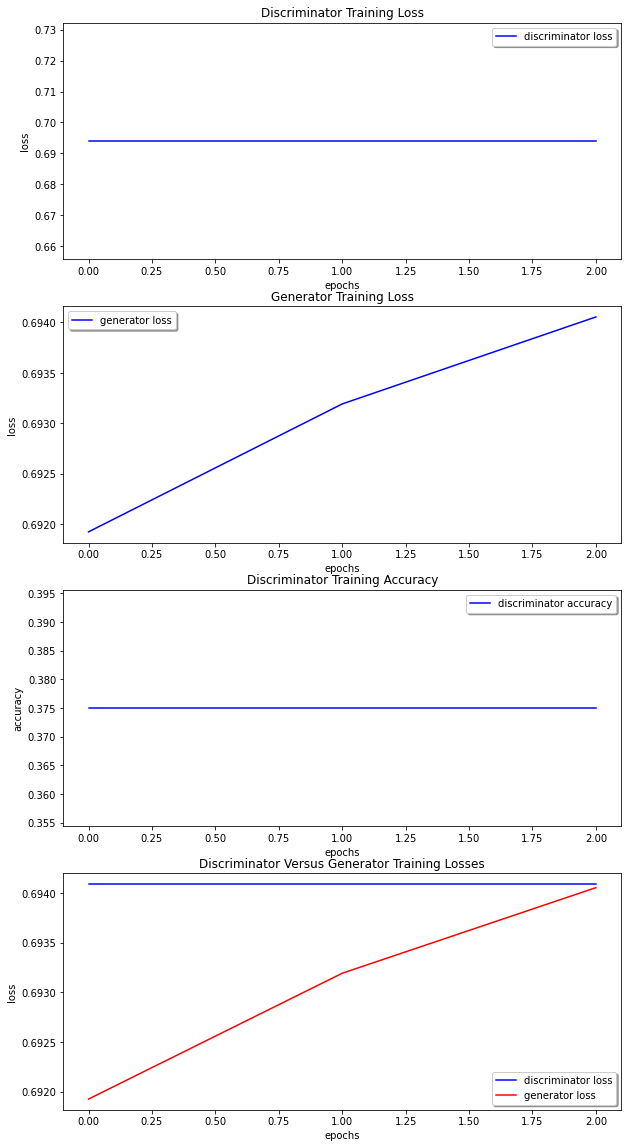

In [ ]:
plot_acc_loss_history(diabetes_history)


##German_credit 

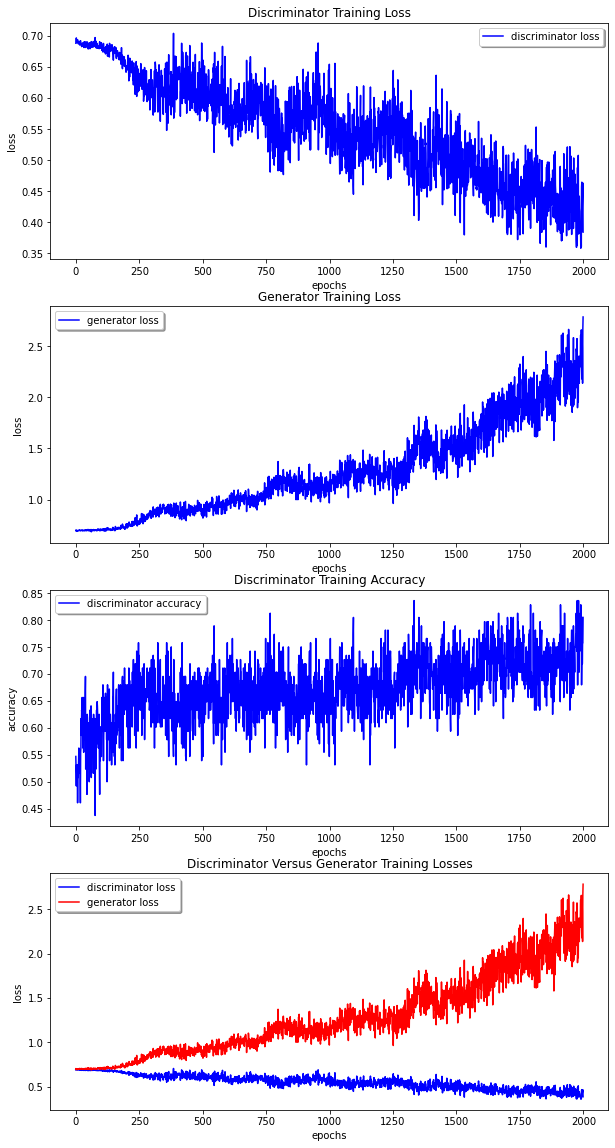

In [ ]:
plot_acc_loss_history(ger_cred_history)


#Performances Analysis

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter

In [ ]:


def analize(model, bb_model):
  generated_samples, c = model.generate_samples(1000)

  bb_y = bb_model.predict_proba(generated_samples)[:,1]
  shuffeled_a, shuffeled_b, shuffeled_y = shuffle_c_y(c=c,y=bb_y)

  # print(generated_samples)
  # y_true = np.zeros((100, 1)) #labels for the generated data samples

  y_hat = model.discriminate(generated_samples, shuffeled_a, shuffeled_b) 
  print(y_hat)
  y_hat = [0 if x<0.5 else 1 for x in y_hat]
  print("Confusion Matrix")
  print(confusion_matrix(shuffeled_y, y_hat))
  counter = Counter()
  counter.update(y_hat)
  print(counter)
  print(f"The number of samples that were able to pass as real samples: {np.sum(y_hat)}")
  return generated_samples, y_hat, bb_y, shuffeled_y


In [ ]:
def plot_scatter_pca_2D(df, color_count, hue="class", color_palate="Paired", title="PCA2D"):
    plt.figure(figsize=(16, 10))
    sns.scatterplot(
        x="pca_one", y="pca_two",
        hue=hue,
        palette=sns.color_palette(color_palate, color_count),
        data=df.loc[:],
        legend="full",
        alpha=0.95
    )
    plt.title(title)
    plt.show()


def plot_scatter_pca_3D(df, title="PCA3D"):
    print(list(df["class"]))
    ax = plt.figure(figsize=(16, 10)).gca(projection='3d')
    ax.scatter(
        xs=df["pca_one"],
        ys=df["pca_two"],
        zs=df["pca_three"],
        c=df["class"],
        label=df["class"],
        alpha=0.95,
        cmap='tab20'
    )
    ax.set_xlabel('pca_one')
    ax.set_ylabel('pca_two')
    ax.set_zlabel('pca_three')
    ax.legend(list(df["class"]),loc='best')
    # plt.legend(df["class"],loc='best')
    plt.title(title)
    plt.show()

def PCA_analysis(data_df):
  pca = PCA(n_components=3)
  pca_result = pca.fit_transform(data_df[data_df.columns[:-1]].values)

  pca_df = pd.DataFrame()
  pca_df["class"] =  data_df["class"]

  pca_df['pca_one'] = pca_result[:, 0]
  pca_df['pca_two'] = pca_result[:, 1]
  pca_df['pca_three'] = pca_result[:, 2]
  return pca_df


##Diabetes

In [ ]:
diabetes_generated_samples, diabetes_y_hat, diabetes_bb_y, diabetes_shuf_y = analize(diabetes_gan, diabetes_black_box_model)


[[0.50207675]
 [0.5026408 ]
 [0.5022527 ]
 [0.5022159 ]
 [0.5031621 ]
 [0.50291497]
 [0.5025819 ]
 [0.50294685]
 [0.5031264 ]
 [0.5028486 ]
 [0.50215787]
 [0.5017622 ]
 [0.50209594]
 [0.5031513 ]
 [0.50314486]
 [0.5028226 ]
 [0.5031705 ]
 [0.5020164 ]
 [0.5019629 ]
 [0.5026048 ]
 [0.502331  ]
 [0.5024409 ]
 [0.5029546 ]
 [0.50303036]
 [0.5027956 ]
 [0.50192726]
 [0.50182515]
 [0.50286484]
 [0.50303084]
 [0.5023305 ]
 [0.50198454]
 [0.5027526 ]
 [0.502525  ]
 [0.5030145 ]
 [0.50218785]
 [0.5020271 ]
 [0.50297296]
 [0.5020196 ]
 [0.502119  ]
 [0.5025477 ]
 [0.5028899 ]
 [0.50287205]
 [0.50185627]
 [0.50304735]
 [0.5023785 ]
 [0.502974  ]
 [0.50200206]
 [0.50234497]
 [0.50223327]
 [0.5024264 ]
 [0.50297624]
 [0.5016294 ]
 [0.5018592 ]
 [0.5029462 ]
 [0.50289536]
 [0.5028258 ]
 [0.50293714]
 [0.5029508 ]
 [0.5015888 ]
 [0.5021231 ]
 [0.5023717 ]
 [0.5022468 ]
 [0.5019599 ]
 [0.5029364 ]
 [0.5026682 ]
 [0.5022403 ]
 [0.50293964]
 [0.5026021 ]
 [0.50261205]
 [0.5018689 ]
 [0.5025189 ]
 [0.50

In [ ]:
from scipy.special import rel_entr,kl_div
# print(kl_divergence(diabetes_p, diabetes_bb_y[:len(diabetes_p)]))
kl_results = kl_div(np.hstack(diabetes_p), np.hstack(diabetes_bb_y[:len(diabetes_p)]))
print(np.sum([x for x in kl_results if x <= 10000]))
# np.asarray(diabetes_bb_y).shape

38.490422290640254


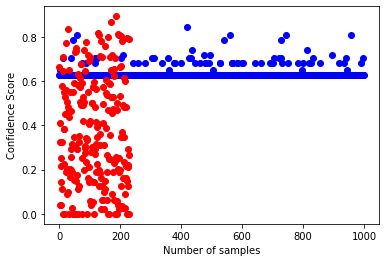

In [ ]:
# Scatter plot the generated samples black box predictions  
plt.scatter(range(len(diabetes_bb_y)), diabetes_bb_y, color='blue')
# Scatter plot the test samples black box predictions 
plt.scatter(range(len(diabetes_p)), diabetes_p, color='red')
plt.xlabel("Number of samples")
plt.ylabel("Confidence Score")
plt.show()

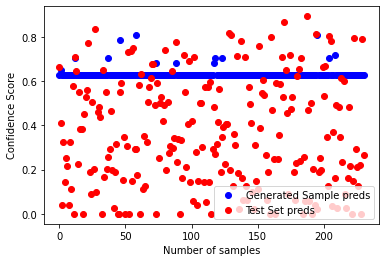

In [ ]:
# The same plot but with specific length of the real set size
# Scatter plot the generated samples black box predictions
plt.scatter(range(len(diabetes_p)), diabetes_bb_y[:len(diabetes_p)], color='blue')
# Scatter plot the test samples black box predictions 
plt.scatter(range(len(diabetes_p)), diabetes_p, color='red')
plt.xlabel("Number of samples")
plt.ylabel("Confidence Score")
plt.legend(['Generated Sample preds', 'Test Set preds'], loc='lower right')
plt.show()

In [ ]:
diabetes_generated_samples

array([[0.58212674, 0.53776807, 0.48686993, ..., 0.6058844 , 0.41729265,
        0.4710859 ],
       [0.5496267 , 0.5046004 , 0.48611316, ..., 0.63995695, 0.40452695,
        0.53654927],
       [0.52633905, 0.5127055 , 0.5015189 , ..., 0.53176093, 0.47471124,
        0.50482893],
       ...,
       [0.48478213, 0.49832442, 0.5302354 , ..., 0.47871208, 0.4631905 ,
        0.4762471 ],
       [0.4880515 , 0.5059301 , 0.5192117 , ..., 0.48013952, 0.5002597 ,
        0.47761685],
       [0.5238395 , 0.51824623, 0.49717376, ..., 0.53464144, 0.47918546,
        0.5111887 ]], dtype=float32)

In [ ]:
diabetes_joined_df = pd.DataFrame(diabetes_generated_samples, columns=normalized_diabetes_df.columns[:-1])
diabetes_joined_df["class"] = diabetes_y_hat
print(diabetes_joined_df["class"])

diabetes_joined_df.loc[diabetes_joined_df['class'] >= 0.5, 'class'] = 3
diabetes_joined_df.loc[diabetes_joined_df['class'] < 0.5, 'class'] = 2

diabetes_joined_df = pd.concat((normalized_diabetes_df,diabetes_joined_df),axis=0)

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: class, Length: 1000, dtype: int64


In [ ]:
diabetes_joined_df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
995,0.535029,0.509481,0.498970,0.545516,0.509948,0.562714,0.463020,0.502975,3.0
996,0.599637,0.540980,0.436664,0.554590,0.520484,0.634787,0.386689,0.530306,3.0
997,0.484782,0.498324,0.530235,0.556976,0.486321,0.478712,0.463190,0.476247,3.0
998,0.488052,0.505930,0.519212,0.505253,0.498737,0.480140,0.500260,0.477617,3.0


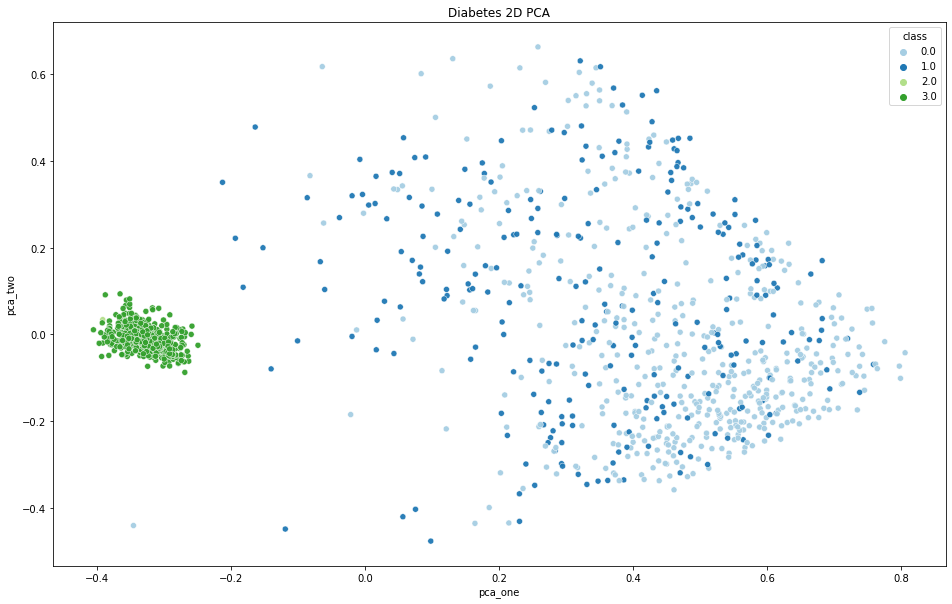

In [ ]:

diabetes_pca_df = PCA_analysis(diabetes_joined_df)

plot_scatter_pca_2D(df=diabetes_pca_df, color_count=len(diabetes_pca_df["class"].unique()), title="Diabetes 2D PCA")



[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0,

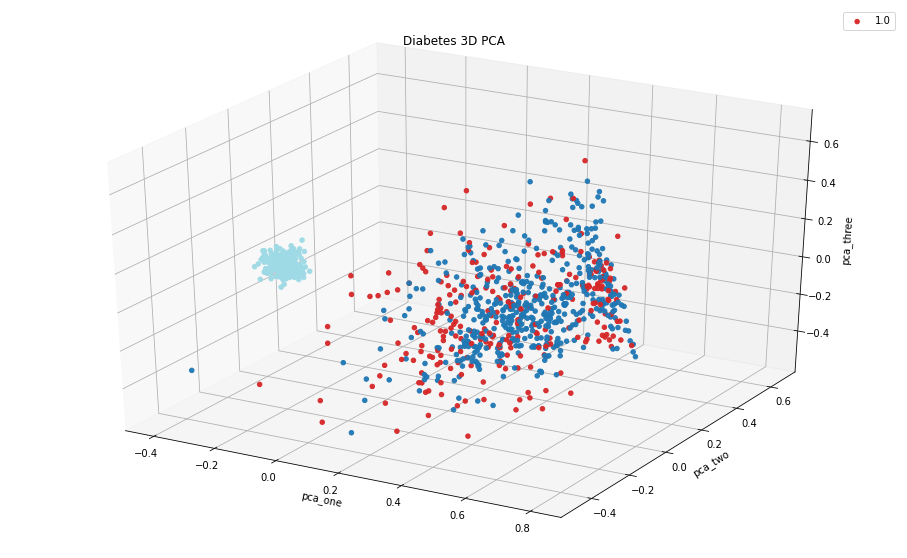

In [ ]:
plot_scatter_pca_3D(df=diabetes_pca_df, title="Diabetes 3D PCA")

##German_credit 

In [ ]:
ger_cred_generated_samples, ger_cred_y_hat, ger_cred_bb_y, ger_cred_shuf_y = analize(ger_cred_gan, ger_cred_black_box_model)



[[0.02352439]
 [0.8146696 ]
 [0.99422246]
 [0.49750376]
 [0.08977785]
 [0.0134134 ]
 [0.4045839 ]
 [0.99376184]
 [0.4370979 ]
 [0.48793614]
 [0.0210922 ]
 [0.47736043]
 [0.99841   ]
 [0.5087418 ]
 [0.43471426]
 [0.6515264 ]
 [0.06231689]
 [0.5193379 ]
 [0.47158018]
 [0.99556655]
 [0.5132036 ]
 [0.96162283]
 [0.01356297]
 [0.12412734]
 [0.47259924]
 [0.99273807]
 [0.69756806]
 [0.0112777 ]
 [0.9879187 ]
 [0.00404172]
 [0.47810775]
 [0.05276737]
 [0.74634564]
 [0.00771676]
 [0.2574991 ]
 [0.47296715]
 [0.4725755 ]
 [0.42141396]
 [0.47828826]
 [0.9901371 ]
 [0.36497337]
 [0.47368062]
 [0.48801813]
 [0.45865944]
 [0.96402776]
 [0.886559  ]
 [0.970339  ]
 [0.4719596 ]
 [0.39372504]
 [0.03086569]
 [0.99895227]
 [0.46851394]
 [0.00985114]
 [0.9962494 ]
 [0.01015542]
 [0.89886826]
 [0.00586641]
 [0.1900499 ]
 [0.43268555]
 [0.5188836 ]
 [0.37118262]
 [0.4764782 ]
 [0.649402  ]
 [0.9829633 ]
 [0.47547254]
 [0.6004316 ]
 [0.17895529]
 [0.00502416]
 [0.06788536]
 [0.9978003 ]
 [0.6957506 ]
 [0.01

In [ ]:
ger_cred_joined_df = pd.DataFrame(ger_cred_generated_samples, columns=normalized_ger_cred_df.columns[:-1])
ger_cred_joined_df['class'] = ger_cred_y_hat
ger_cred_joined_df.loc[ger_cred_joined_df['class'] >= 0.5, 'class'] = 3
ger_cred_joined_df.loc[ger_cred_joined_df['class'] < 0.5, 'class'] = 2

ger_cred_joined_df = pd.concat((normalized_ger_cred_df,ger_cred_joined_df),axis=0)

In [ ]:
ger_cred_joined_df

,2,5,8,11,13,16,18,b'A11',b'A12',b'A13',b'A14',b'A30',b'A31',b'A32',b'A33',b'A34',b'A40',b'A41',b'A410',b'A42',b'A43',b'A44',b'A45',b'A46',b'A48',b'A49',b'A61',b'A62',b'A63',b'A64',b'A65',b'A71',b'A72',b'A73',b'A74',b'A75',b'A91',b'A92',b'A93',b'A94',b'A101',b'A102',b'A103',b'A121',b'A122',b'A123',b'A124',b'A141',b'A142',b'A143',b'A151',b'A152',b'A153',b'A171',b'A172',b'A173',b'A174',b'A191',b'A192',b'A201',b'A202',class
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.736224,0.094092,0.810787,0.575629,0.729006,0.763239,0.953876,0.600538,0.398086,0.597585,0.368950,0.254825,0.839370,0.499372,0.421466,0.273228,0.288159,0.472275,0.405817,0.840085,0.737274,0.590822,0.601733,0.509749,0.737587,0.713499,0.387828,0.263991,0.202555,0.790408,0.423508,0.517365,0.524381,0.841603,0.148858,0.122983,0.344724,0.618022,0.289116,0.457979,0.134645,0.573313,0.744977,0.506079,0.241043,0.592966,0.681329,0.956470,0.736961,0.456384,0.809037,0.452147,0.772457,0.355338,0.712228,0.713750,0.275407,0.628879,0.662488,0.506112,0.487289,2
996

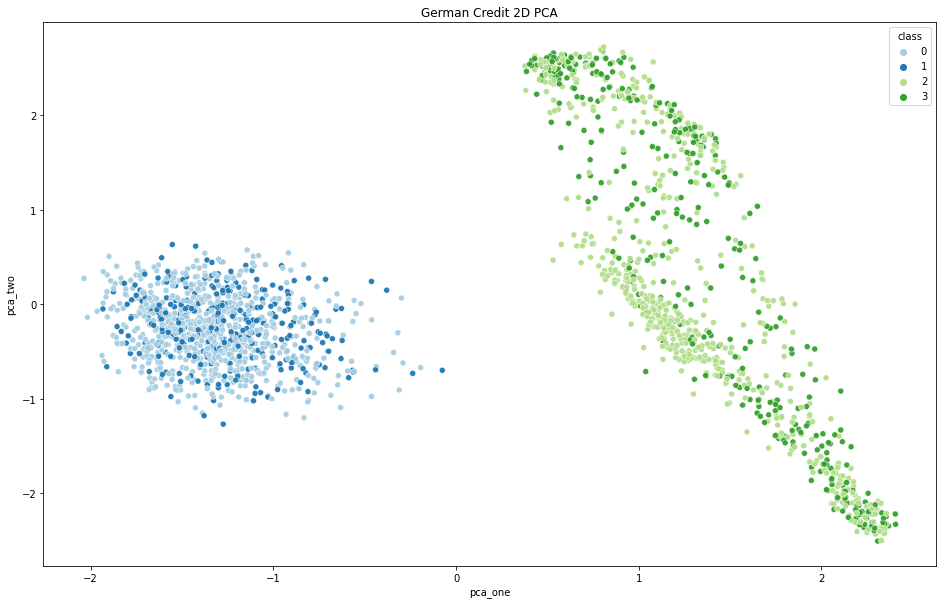

In [ ]:
ger_cred_pca_df = PCA_analysis(ger_cred_joined_df)
plot_scatter_pca_2D(df=ger_cred_pca_df, color_count=len(ger_cred_joined_df["class"].unique()), title="German Credit 2D PCA")



[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 

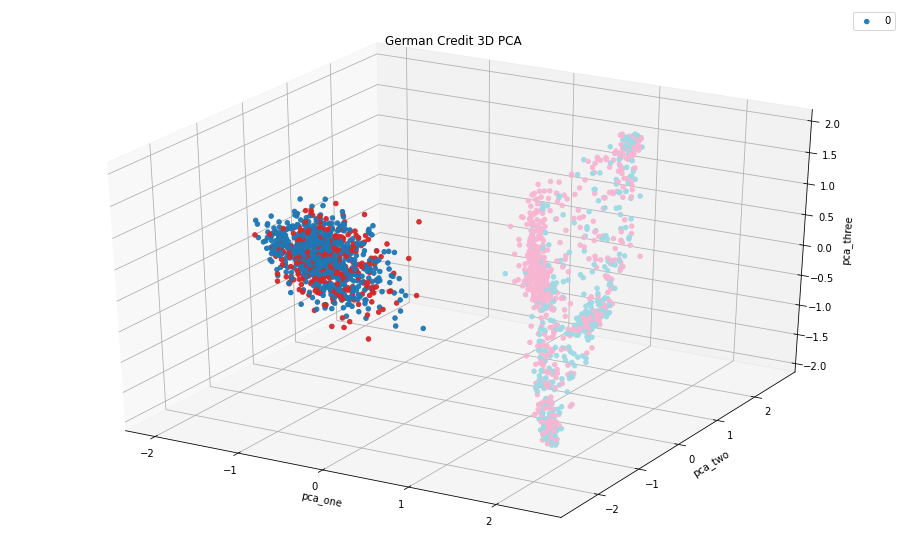

In [ ]:
plot_scatter_pca_3D(df=ger_cred_pca_df, title="German Credit 3D PCA")

In [ ]:
from scipy.special import rel_entr,kl_div
# print(kl_divergence(diabetes_p, diabetes_bb_y[:len(diabetes_p)]))
kl_results = kl_div(np.hstack(ger_cred_p), np.hstack(ger_cred_bb_y[:len(ger_cred_p)]))
print(np.sum([x for x in kl_results if x <= 10000]))
# np.asarray(diabetes_bb_y).shape

21.60273524662935


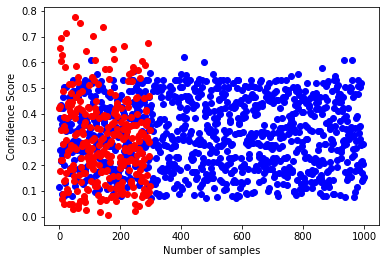

In [ ]:
# Scatter plot the generated samples black box predictions  
plt.scatter(range(len(ger_cred_bb_y)), ger_cred_bb_y, color='blue')
# Scatter plot the test samples black box predictions 
plt.scatter(range(len(ger_cred_p)), ger_cred_p, color='red')
plt.xlabel("Number of samples")
plt.ylabel("Confidence Score")
plt.show()

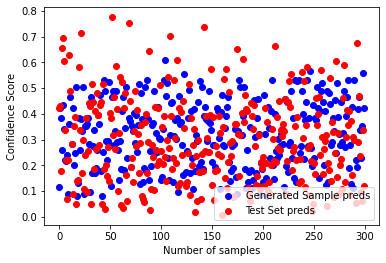

In [ ]:
# The same plot but with specific length of the real set size
# Scatter plot the generated samples black box predictions
plt.scatter(range(len(ger_cred_p)), ger_cred_bb_y[:len(ger_cred_p)], color='blue')
# Scatter plot the test samples black box predictions 
plt.scatter(range(len(ger_cred_p)), ger_cred_p, color='red')
plt.xlabel("Number of samples")
plt.ylabel("Confidence Score")
plt.legend(['Generated Sample preds', 'Test Set preds'], loc='lower right')
plt.show()